In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/tmp/ipykernel_20448/1259086209.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [42]:

def generate(m):

    X=np.random.randn(m)*10
    noise=np.random.randn(m)*5

    y=3*X+1+noise
    return X,y




In [46]:
X,y=generate(100)
X.mean()

1.1515714804623773

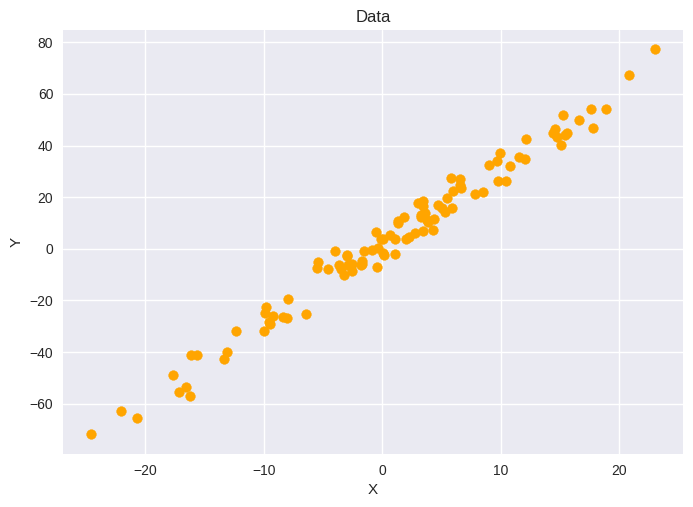

In [44]:
def plot(X,y,color='orange',title='Data'):
    plt.scatter(X,y,color=color)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
plot(X,y)

In [45]:
X.m

0.962010488769921

In [59]:
def normalise(X):
    X=(X-X.mean())/X.std()
    return X
nX=normalise(X)
nX.mean()



-4.5241588253475126e-17

In [60]:
nX.std()

1.0

In [68]:
def TrainTestsplit(X,y,split=0.8):
    m=X.shape[0]
    data=np.zeros((m,2))
    data[:,0]=X
    data[:,1]=y
    np.random.shuffle(data)
    split=int(split*m)
    XT=data[:split,0]
    yT=data[:split,1]
    Xt=data[split:,0]
    yt=data[split:,1]
    return XT,yT,Xt,yt
XT,yT,Xt,yt=TrainTestsplit(X,y)
    

In [69]:
XT

array([ -1.99059039,  -0.4515455 ,  12.10117037,   9.82088471,
       -10.06671433,  20.23837279, -10.49461831,   8.61081997,
         5.39270134,  20.59772391,   6.53835076, -10.72118668,
       -18.36466879,  12.15299269,  -8.82132548,  -1.70534116,
         6.83958337,  11.33985682,   6.87027257,  12.90357827,
        -5.00189581,  -7.68513208,  -2.49487113, -13.76311646,
         9.80957205,  13.07897386,   6.12522068,   3.15347046,
        -0.43080081,  11.64526738,   5.05563888,   0.81552279,
         1.10721255,  -5.08176209,  -3.37655095,   5.33108799,
        -3.86753561,   2.05298405,   9.99415517,  17.7971887 ,
        -6.38246912,  -4.64359191,   7.90964434,  -5.63244393,
        -9.19928264,  -4.51784488,  -5.11772901, -11.05848471,
         3.72409412,  -8.34404688,   1.5164438 ,   2.10662965,
         5.07822262, -11.93828634,  -8.70396666,   7.33823758,
        -5.98966948,   7.20887492,  -8.45598403,   9.42126696,
        14.62149104,  -0.28458671,   4.32310802,   8.34

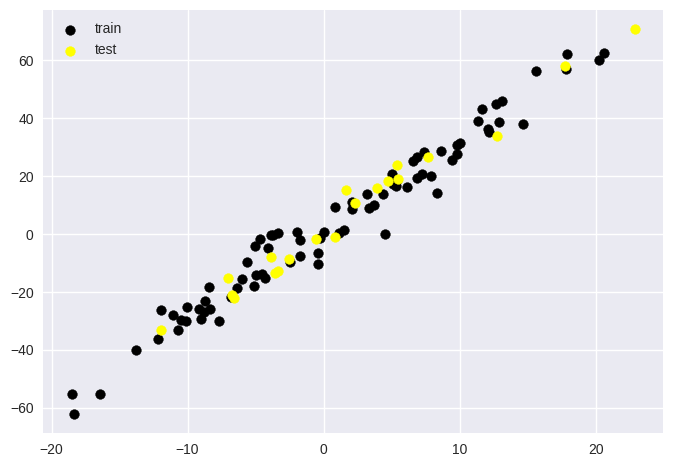

In [74]:
plt.scatter(XT,yT,color="black",label="train")
plt.scatter(Xt,yt,color="yellow",label="test")
plt.legend()
plt.show()